## Check/install TensorFlow version
**Must be version 2.1.0**


In [1]:
# Switch the TensorFlow version 2.1
!pip install tensorflow==2.1.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0
ERROR: No matching distribution found for tensorflow==2.1.0


## Import libraries and create noisy data



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

TensorFlow version: 2.4.1
Data created successfully


# Non linear regression / curve fitting

You'll find more information and detailed explainations on [my blog](https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/).

[Video of the expected result](https://youtu.be/7z86Lxzf_2o)


## Display curve to fit

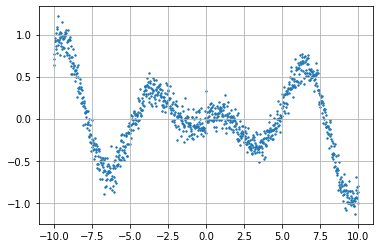

<Figure size 432x288 with 0 Axes>

In [8]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [9]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


## Training over 100 epochs

In [5]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.1855
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1934
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1771
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1652
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1768
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1738
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1614
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1633
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1453
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1351
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1334
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1045
Epoch 13/100
32/32 [=================

# Predict and display

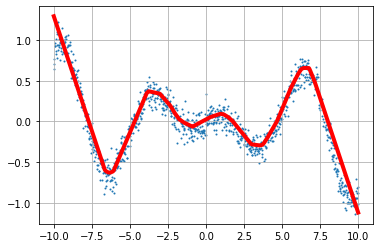

In [6]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

In [10]:
for x in range(100):
  # One epoch
  model.fit( x_data, y_data, epochs=1, verbose=1)

  # Compute the output
  y_predicted = model.predict(x_data)
#  loss = tf.keras.losses.mean_squared_error(y_data, y_predicted)


  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  #files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()



32/32 [==============================] - 0s 8ms/step - loss: 0.0141


<Figure size 432x288 with 0 Axes>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = np.linspace(-10, 10, num=1000)
x_plus_y = x_data + y_data

#x_plus_y = np.array((x_data, y_data))

z_data = 0.1*x_plus_y*np.cos(x_plus_y) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

TensorFlow version: 2.4.1
Data created successfully


# Non linear regression / curve fitting


## Display curve to fit

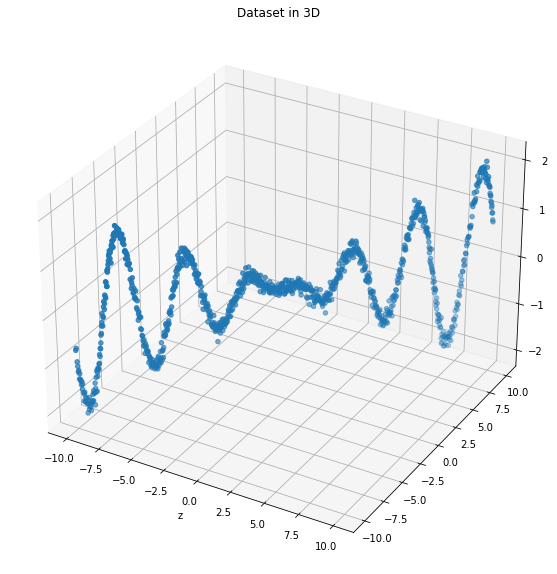

In [28]:
# Display the dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, marker='o')

ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')
plt.title('Dataset in 3D')
plt.show()

# plt.scatter(x_data[::1], y_data[::1], s=2)
# plt.grid()
# plt.show()
# plt.savefig('dataset.png',dpi=300)
# #files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [29]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


## Training over 100 epochs

In [32]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 23.0843
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7001
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 13/100
32/32 [================

# Predict and display

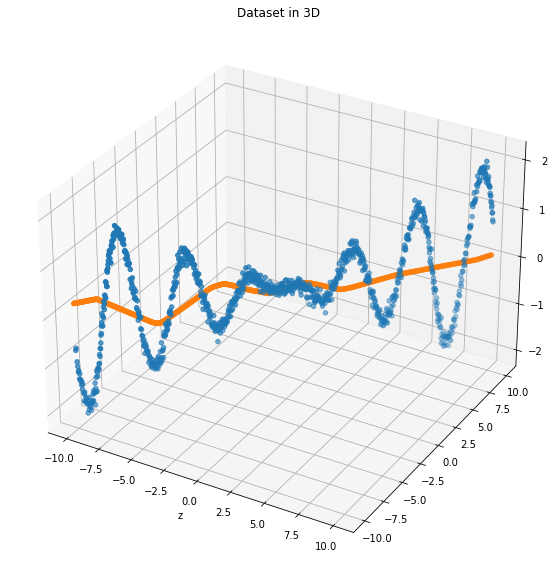

<Figure size 432x288 with 0 Axes>

In [33]:
# Compute the output 
z_predicted = model.predict(x_plus_y)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, marker='o')
ax.scatter(x_data, y_data, y_predicted)

ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')
plt.title('Dataset in 3D')
plt.show()


# # Display the result
# plt.scatter(x_data[::1], y_data[::1], s=1)
# plt.plot(x_data, y_predicted, 'r', linewidth=4)
# plt.grid()
# #plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

In [20]:
for x in range(100):
  # One epoch
  model.fit( x_plus_y, z_data, epochs=1, verbose=1)

  # Compute the output
  y_predicted = model.predict(x_data)
#  loss = tf.keras.losses.mean_squared_error(y_data, y_predicted)


  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  #files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()



32/32 [==============================] - 0s 1ms/step - loss: 0.5620


<Figure size 432x288 with 0 Axes>